<a href="https://colab.research.google.com/github/Bryan-Kan/Minera-o_de_Dados/blob/master/Bryan_Braggion_Pimentel_de_Lima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE P1**

## Análise Exploratória de Dados

Links deste exercício:
- https://www.kaggle.com/datasets/zynicide/wine-reviews
- https://seaborn.pydata.org/
- https://www.wine-searcher.com/critics-17-wine+enthusiast

Fomos contratados por uma grande empresa distribuidora de vinhos. Nosso cliente deseja melhorar as vendas entregando produtos que agradem os diversos perfis de clientes. O foco do nosso projeto aqui é desenvolver uma análise exploratória nos [dados de avaliações de vinhos](https://www.kaggle.com/datasets/zynicide/wine-reviews).

Uma análise exploratória bem elaborada consiste em algumas etapas:

- Compreensão do negócio
- Compreensão dos dados
- Preparar os dados (limpeza e tratamento)
- Análise de dados (extrair informações relevantes e responder perguntas)
- Avaliação dos resultados

Nosso objetivo ao concluir esse projeto é responder as seguintes perguntas:

1. De onde vem o melhor vinho ?
2. O preço do vinho está relacionado com a qualidade ?
3. Certas variedades de uvas são de maior qualidade ?
4. Qual é o melhor vinho em cada faixa de preço ?
5. Que palavras são mais utilizadas para descrever um vinho ?

Vamos começar!

# **Verificando Dados**

## **Importações**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Examinando o dataset**

In [2]:
df = pd.read_csv("/content/winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**Nome das Colunas:**

In [3]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

Pode-se ver que tem colunas que podem ser removidas como unnamed que é um indice

**Informações dos dados:**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


Analise Estatistica das colunas de valor numérico

In [5]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


com essa anlise podemos ver que a pontuação vai de 80 a 100 e os preços vão de 4,00 até 3.300,00 dolares e a pontução segue uma classificação semelhante a este site https://www.wine-searcher.com/critics-17-wine+enthusiast

Wine Enthusiast's 100-point wine-scoring scale

98–100 – Classic

94–97 – Superb

90–93 – Excellent

87–89 – Very good

83–86 – Good

80–82 – Acceptable

Vinhos avaliados por País

In [6]:
df["country"].value_counts()

,count
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


A maioria dos vinhos veio dos Estados Unidos seguido da França, Italia, Espanha e Portugal

In [7]:
df["variety"].value_counts()

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Cabernet Sauvignon-Barbera,1
Sauvignonasse,1
Forcallà,1


# **Limpando Dados**

**Copiando o Dataframe**

In [8]:
df1 = df.copy()

**Removendo colunas desnecessarias**

In [9]:
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df1.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**Removendo dados vazios**

Analisando os dados

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


Calculo para ver quantos dados ainda sobrara de dados

In [11]:
df.shape

(129971, 14)

In [12]:
print("{:.0%}".format(df1["price"].count() / df1.shape[0]))

93%


Removendo dados vazios

In [13]:
df1 = df1.dropna(subset=["country", "price", "variety"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


# **Analise Exploratória**

Vendo as distribuição dos pontos nas avaliações dos vinhos

Text(0, 0.5, 'Frequência')

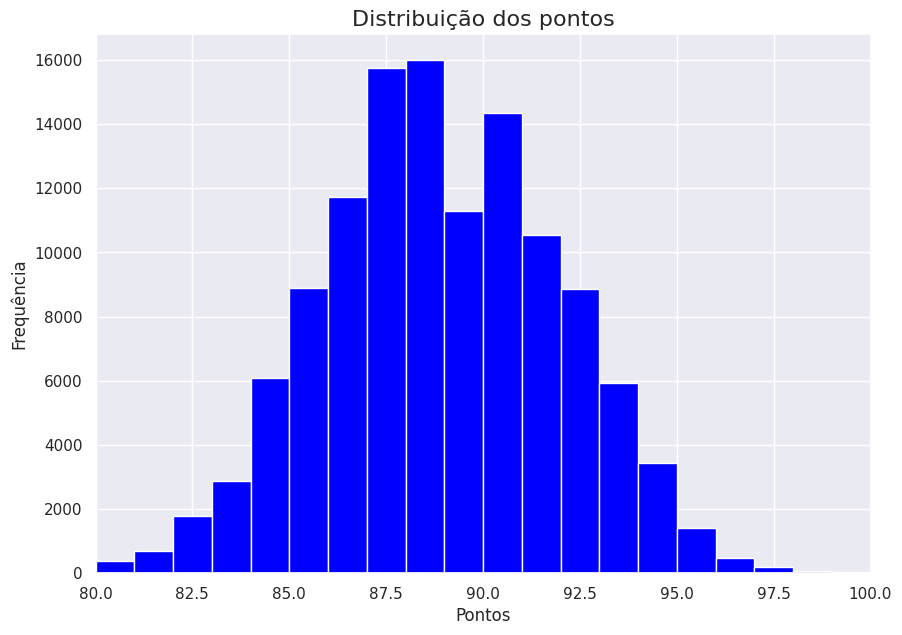

In [14]:
plt.figure(figsize=(10, 7))
plt.hist(data=df1, x='points',
         bins=np.arange (80, df1['points'].max()+1, 1),
         color='blue')
plt.xlim(80, 100)
plt.title('Distribuição dos pontos', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('Frequência')

**Países TOP 10 de produção de vinho**

In [15]:
country_top_10 = df1["country"].value_counts()[:10]
country_top_10

,count
country,
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294


**Gerando Gráfico de barras**

Com base nos dados anteriores

Text(0, 0.5, 'Total de avaliações')

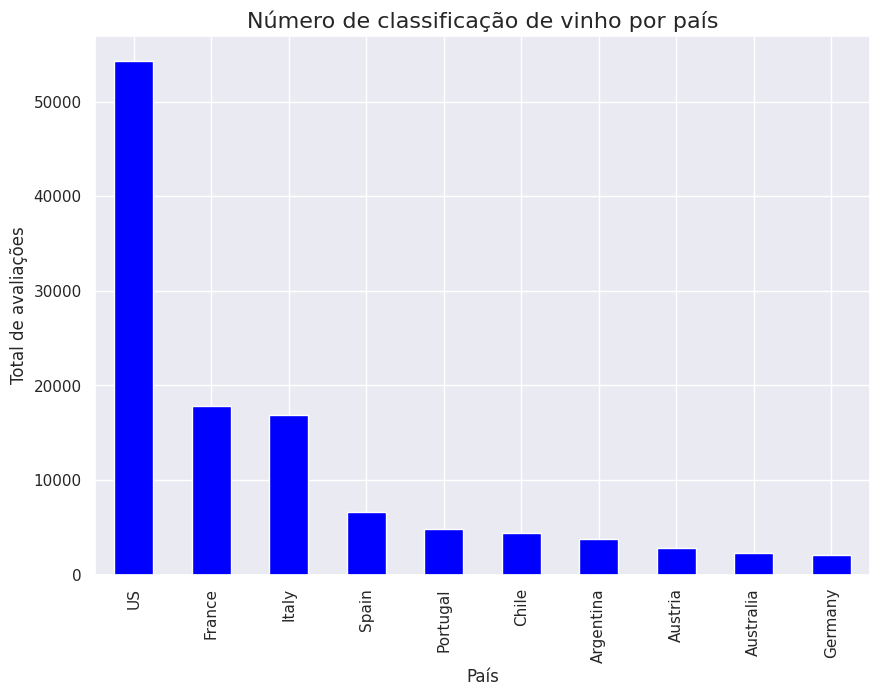

In [16]:
plt.figure(figsize=(10, 7))
country_top_10.plot(kind='bar', color = 'blue')
plt.title('Número de classificação de vinho por país', fontsize=16)
plt.xlabel('País')
plt.ylabel('Total de avaliações')

Com base nos dados acima quantos países produzem vinhos de melhor qualidade de acordo com a classificação

In [17]:
melhor_qualidade = df1.groupby("country")['points'].agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(ascending=False)[:10]
#convertendo em serie o DataFrame usando o método toframe
melhor_qualidade.to_frame().style.background_gradient(cmap='Blues', high=0.5)

,points
country,
England,91.550725
India,90.222222
Austria,90.190782
Germany,89.836321
Canada,89.377953
Hungary,89.165517
China,89.000000
France,88.734867
Luxembourg,88.666667


Gerando outro gráfico a partir dos dados anteriores

<ipython-input-18-a28392fe03b1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Blues_r')


Text(0, 0.5, 'País')

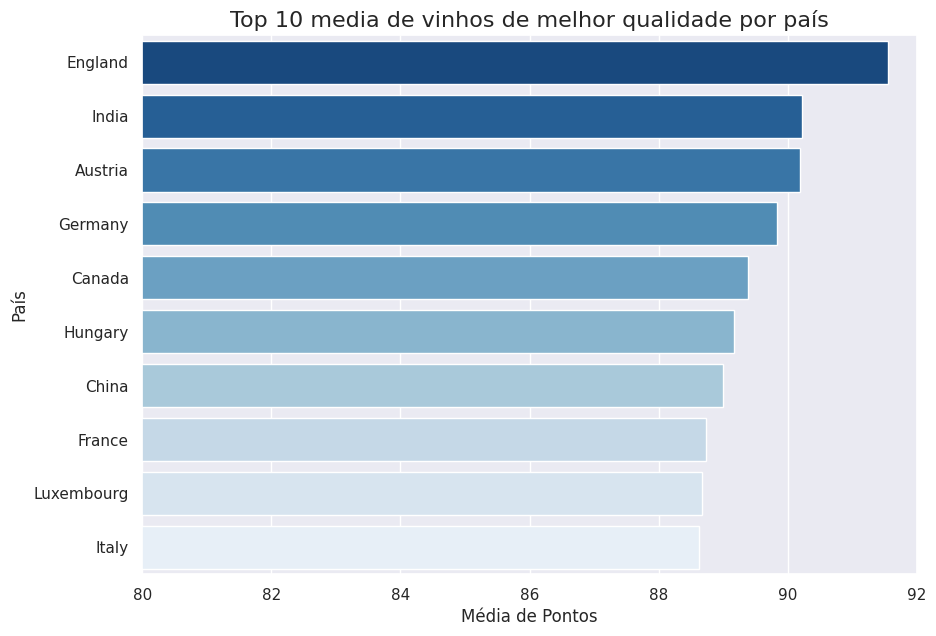

In [18]:
y = melhor_qualidade.index.to_series()
x = melhor_qualidade

plt.figure(figsize=(10, 7))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette='Blues_r')
plt.title('Top 10 media de vinhos de melhor qualidade por país', fontsize=16)
plt.xlabel('Média de Pontos')
plt.ylabel('País')

A inglaterra tem a melhor avaliação, isso pode ocorrer pois temos menos dados de vinho deles e que possuem mais pontuação.

então vamos selecionar vinhos de pontuação mais alta

In [19]:
highs_scores = df1[df1['points']>=95]
highs_scores["country"].value_counts()

,count
country,
US,991
France,509
Italy,326
Austria,103
Portugal,96
Germany,62
Spain,51
Australia,47
Argentina,11


**Grafico tipo BoxPlot**

Para ver máximo, minimo e media de cada pais

Text(0, 0.5, 'País')

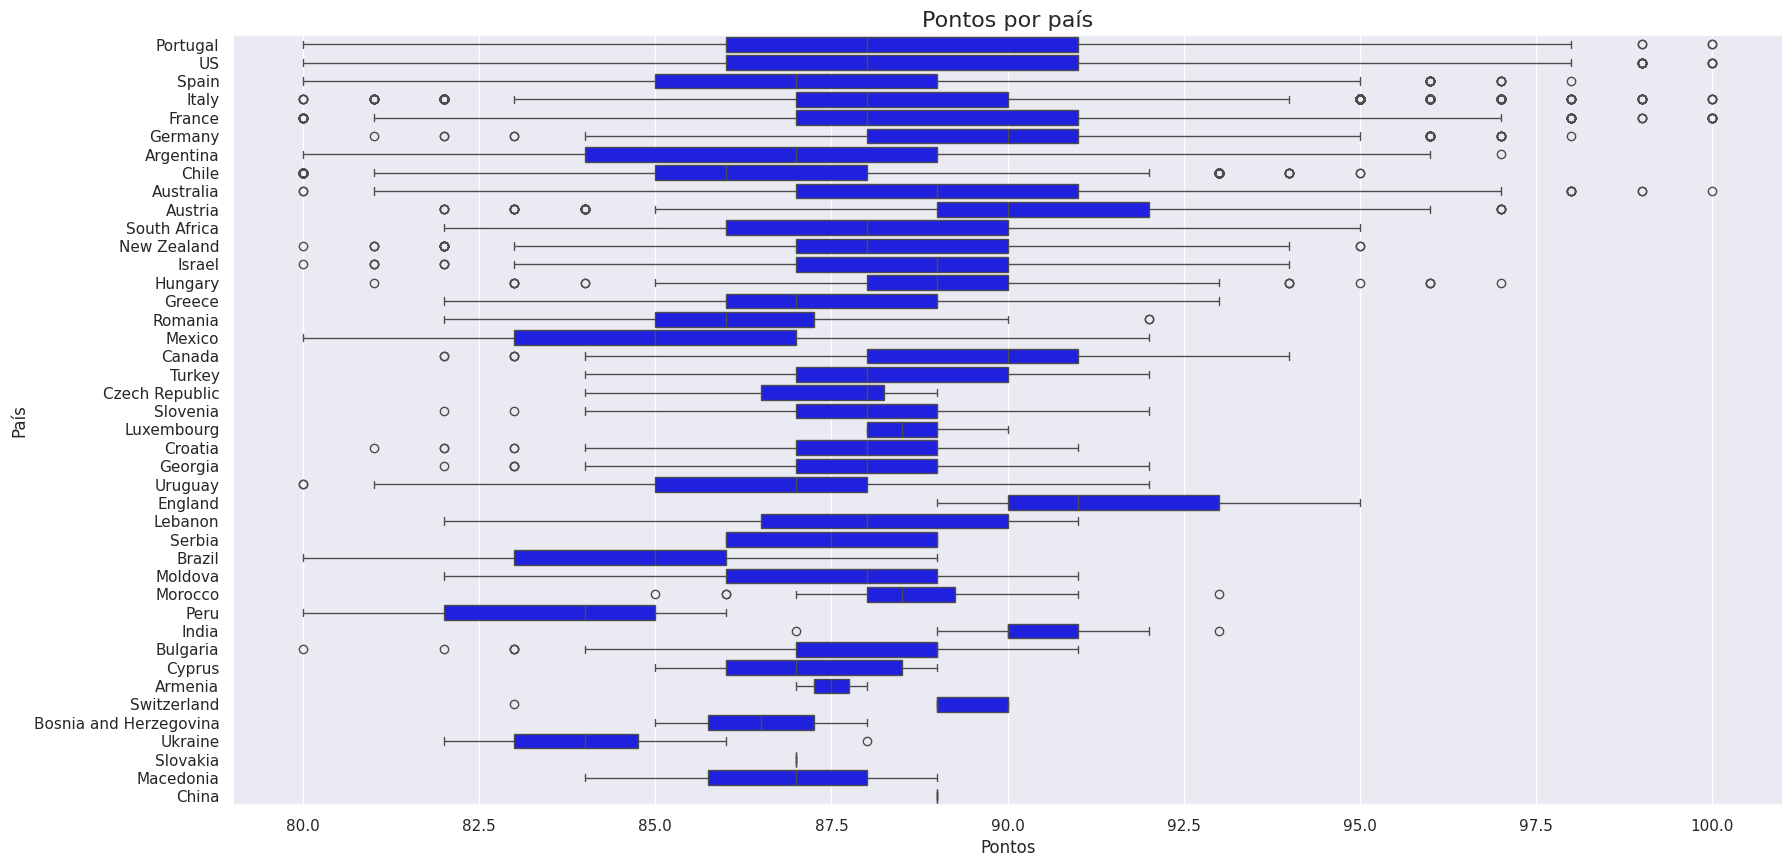

In [20]:
plt.figure(figsize=(20, 10))
sns.boxplot(data= df1, x='points', y='country', color='Blue')
plt.title('Pontos por país', fontsize= 16)
plt.xlabel('Pontos')
plt.ylabel('País')

Diferente da inglaterra ao olhar esse gráfico Portugal e os Estados Unidos são alguns dos poucos paizes que tem a pontuação máxima porem a inglaterra tem uma média bem alta em comparação aos outros

**Avaliando os preços nesses países**

<ipython-input-21-9f4e5e8b5374>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Blues_r')


Text(0, 0.5, 'País')

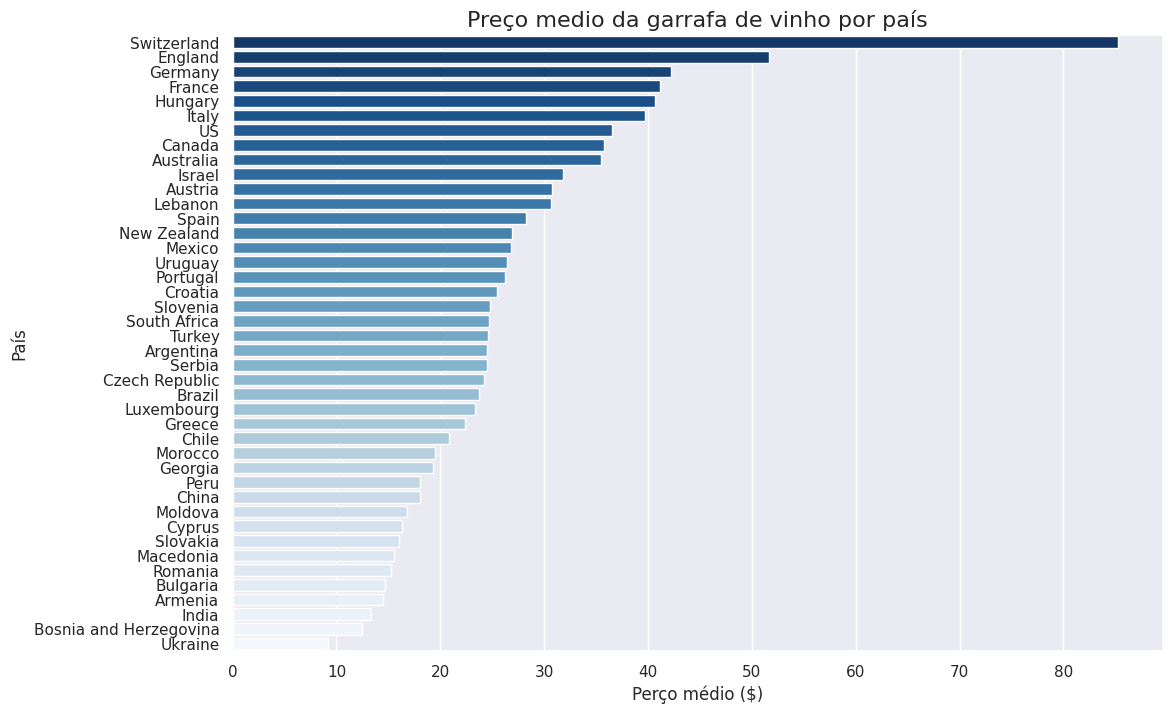

In [21]:
average_price = df1.groupby("country")['price'].mean()
average_price = average_price.sort_values(ascending=False)
y = average_price.index.to_series()
x = average_price.values

plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, palette='Blues_r')
plt.title('Preço medio da garrafa de vinho por país', fontsize=16)
plt.xlabel('Perço médio ($)')
plt.ylabel('País')

Suiça tem o preço mais alto de 80 dolares emquanto a Ucrania esta na outra ponta com o valor mais baixo de  10 dolares

**Vendo se o Preço tem relação com a qualidade**

Text(0, 0.5, 'Frequência')

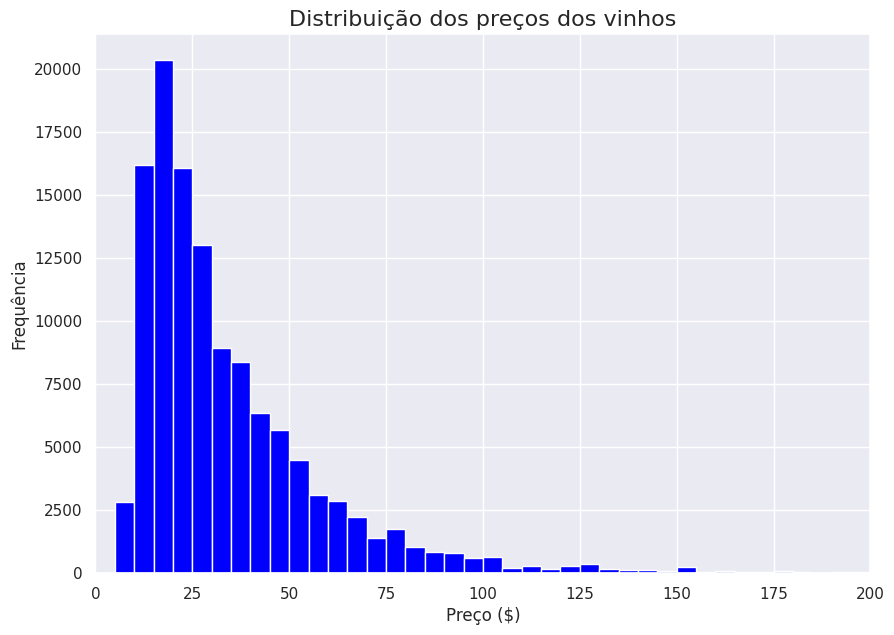

In [22]:
plt.figure(figsize=(10, 7))
bins = np.arange (0, df1["price"].max()+5, 5)
plt.hist(data=df1, x='price', bins=bins, color='Blue')
plt.xlim(0, 200)
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')

Os dados estão tendendo para esquerda

**Transformação Logaritima**

In [23]:
#Distribuição normal
df1["price"].describe()

,price
count,120915.000000
mean,35.368796
std,41.031188
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


In [24]:
#Distribuição logaritima
np.log10(df1["price"].describe())

,price
count,5.082480
mean,1.548620
std,1.613114
min,0.602060
25%,1.230449
50%,1.397940
75%,1.623249
max,3.518514


**Agora utilizando os dados do logaritimo para nosso histograma**

Text(0, 0.5, 'Frequência')

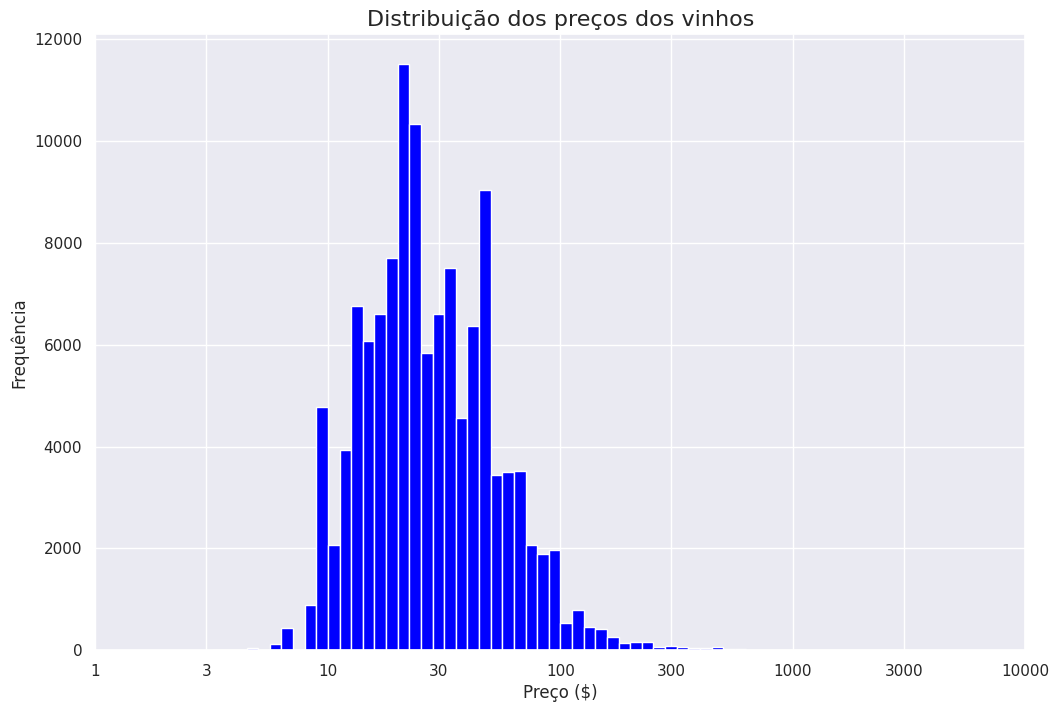

In [25]:
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=df1, x='price', bins=bins, color='blue')
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')

Agora ele ficou mais normal apesar de ter um pico perto do 10 e outro próximo do 50

**Gráfico Scatter**

Para determinar se o preço tem relação com os pontos

Text(0, 0.5, 'Pontos')

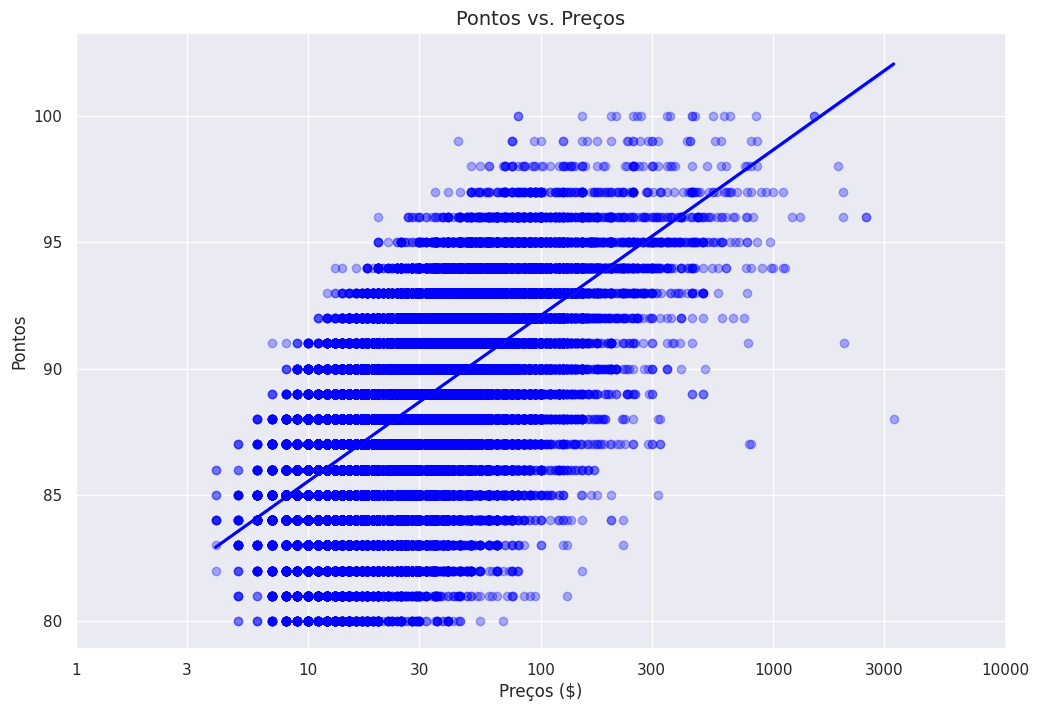

In [26]:
#HeatMap

x = [1,3,10,30,100,300,1000,3000,10000]

plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='points', data=df1, color='Blue', logx=True, scatter_kws={'alpha':0.3})
plt.title('Pontos vs. Preços', fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel('Preços ($)')
plt.ylabel('Pontos')

O gráfico mostra que tem uma relação proxima entre os pontos e o preço do vinho, sendo a tendencia os vinhos mais caros terem melhores avaliações, ha tambem vinho que estão um pouco fora como os que estão proximos de 4 dolares e 3000.

**Vamos listar eles**

In [27]:
df1[df1['price'] == df1['price'].min()][:1]

,country,description,points,price,province,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis


In [28]:
df1[df1['price'] == df1['price'].max()][:1]

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


Podemos ver que o vinho de 85 pontos tem o valor de 4 dolares e um de 88 pontos de 3000 dolares onde vemos que a diferença da pontuação é bem pequena

In [29]:
df1['variety'].value_counts()[:20]

,count
variety,
Pinot Noir,12785
Chardonnay,11077
Cabernet Sauvignon,9384
Red Blend,8466
Bordeaux-style Red Blend,5340
Riesling,4971
Sauvignon Blanc,4780
Syrah,4086
Rosé,3261


Visualizando os dados no boxplot

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Pinot Noir'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Riesling'),
  Text(6, 0, 'Sauvignon Blanc'),
  Text(7, 0, 'Syrah'),
  Text(8, 0, 'Rosé'),
  Text(9, 0, 'Merlot'),
  Text(10, 0, 'Zinfandel'),
  Text(11, 0, 'Malbec'),
  Text(12, 0, 'Sangiovese'),
  Text(13, 0, 'Nebbiolo'),
  Text(14, 0, 'Portuguese Red'),
  Text(15, 0, 'White Blend'),
  Text(16, 0, 'Sparkling Blend'),
  Text(17, 0, 'Tempranillo'),
  Text(18, 0, 'Rhône-style Red Blend'),
  Text(19, 0, 'Pinot Gris')])

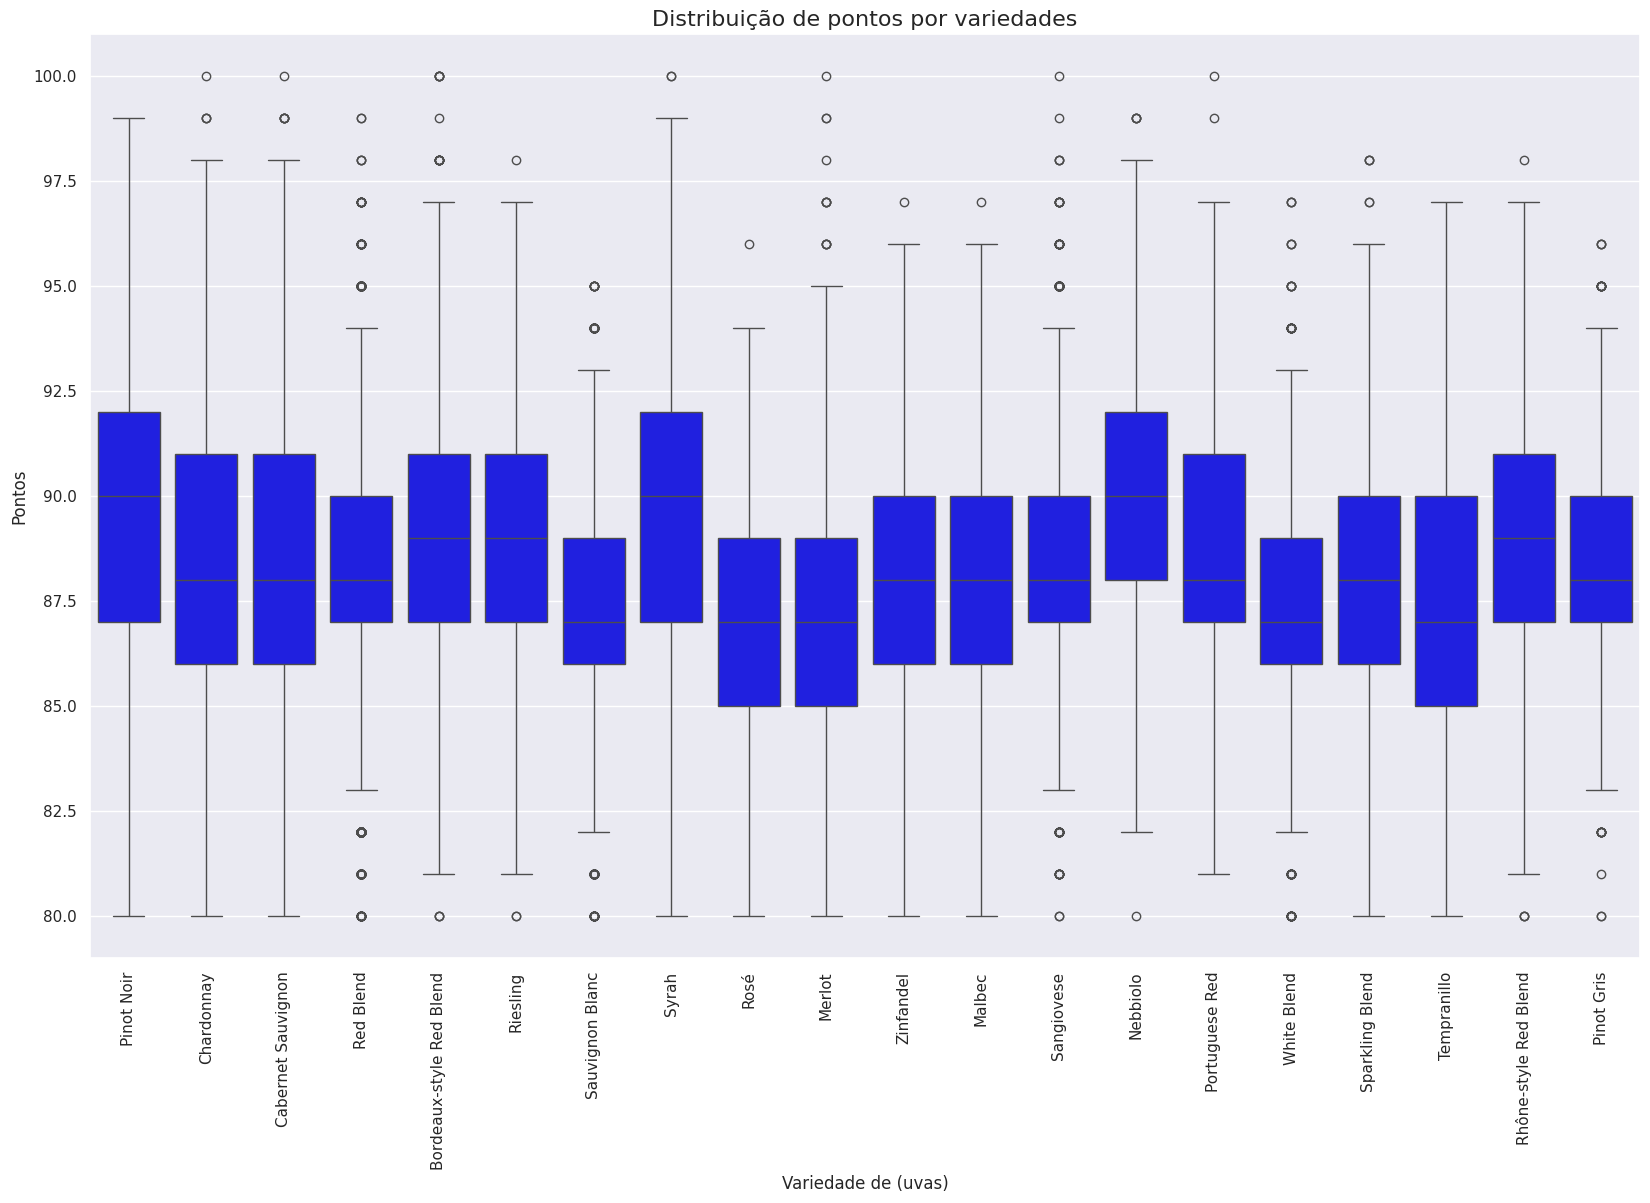

In [31]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=df1,
            x='variety',
            y='points',
            color='Blue',
            order=df1['variety'].value_counts().iloc[:20].index)

plt.title('Distribuição de pontos por variedades', fontsize=16)
plt.xlabel('Variedade de (uvas)')
plt.ylabel('Pontos')
plt.xticks(rotation=90)

Listando os **TOP 20** vinhos podemos perceber que o pinot noir tem a média mais alta das avaliações.

Sabendo que o preço esta relacionado a qualidade, vamos descobrir a relação de custo-beneficio em algumas faixas de preços.

Até $15

Entre 15 e 30

Entre 30 e 50

Acima de $50

In [32]:
# top 10 custando até $15
under_15 = df1.drop(['description', 'province', 'winery'], axis=1)
under_15 = under_15[under_15['price']<=15]
under_15 = under_15.sort_values(by='points', ascending=False)[:10]
under_15.style.background_gradient(cmap='YlOrRd', high=0.5, subset=['price'])

,country,points,price,title,variety
19136,Spain,94,14.000000,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry
23974,Portugal,94,13.000000,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red
12255,South Africa,93,15.000000,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon
129572,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
37882,Australia,93,15.000000,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend
74042,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
52776,US,93,14.000000,Uvaggio 2009 Vermentino (Lodi),Vermentino
43193,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier
9609,France,93,13.000000,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot
59823,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier


Analisando os dados o melhor vinho seria o espanhol de 14 dolares e 94 pontos

In [34]:
# top 10 custando entre $15 e $30
between_15_and_30 = df1.drop(['description', 'province', 'winery'], axis=1)
between_15_and_30 = between_15_and_30.query('price > 15 and price <= 30')
between_15_and_30 = between_15_and_30.sort_values(by='points', ascending=False)[:10]
between_15_and_30.style.background_gradient(cmap='YlOrRd', high=0.5, subset=['price'])

,country,points,price,title,variety
54311,Austria,96,28.000000,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling
81902,US,96,30.000000,Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay
45992,France,96,28.000000,Château Filhot 2014 Sauternes,Bordeaux-style White Blend
102489,US,96,27.000000,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay
119658,Spain,96,30.000000,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez
101580,US,96,20.000000,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah
9901,France,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling
40309,Italy,96,27.000000,Isole e Olena 2010 Chianti Classico,Red Blend
109845,US,96,30.000000,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir
54253,US,96,27.000000,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado),Grenache


Bem ja nessa analise compensa mais o vinho do Estados Unidos de 20 dolares e 96 pontos.

In [35]:
# top 10 custando entre $30 e $50
between_30_and_50 = df1.drop(['description', 'province', 'winery'], axis=1)
between_30_and_50 = between_30_and_50.query('price > 30 and price <= 50')
between_30_and_50 = between_30_and_50.sort_values(by='points', ascending=False)[:10]
between_30_and_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=['price'])

,country,points,price,title,variety
118059,US,99,44.000000,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay
1560,US,98,50.000000,Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend
47432,US,97,50.000000,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay
4504,US,97,50.000000,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel
114981,US,97,35.000000,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah
45986,France,97,45.000000,Château Coutet 2014 Barsac,Bordeaux-style White Blend
125831,US,97,50.000000,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay
16524,Portugal,97,40.000000,Taylor Fladgate NV 325 Anniversary (Port),Port
128268,US,97,50.000000,Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon
89730,France,97,50.000000,René Muré 2015 Clos Saint Landelin Vorbourg Grand Cru Riesling (Alsace),Riesling


O melhor vinho nesse caso é o de 44 dolares e 99 pontos dos Estados Unidos

In [36]:
# top 10 custando acima de $50
above_50 = df1.drop(['description', 'province', 'winery'], axis=1)
above_50 = above_50.query('price > 50')
above_50 = above_50.sort_values(by='points', ascending=False)[:10]
above_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=['price'])

,country,points,price,title,variety
113929,US,100,80.000000,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah
111755,France,100,1500.000000,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend
89728,France,100,250.000000,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend
123545,US,100,80.000000,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah
118058,US,100,450.000000,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
89729,France,100,617.000000,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay
45781,Italy,100,550.000000,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese
111753,France,100,1500.000000,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend
111754,Italy,100,270.000000,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),Sangiovese Grosso
42197,Portugal,100,450.000000,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red


Analisando os dados é possivel ver que tem dois vinhos de 80 dolares de 100 pontos e ambos são do Estados Unidos.

# Analisando as palavras mais citadas

In [37]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = df1['description'][1]
text = " ".join(i for i in df1['description'])
len(text)

29653210

Removendo palavras que vão atraplhar a analise dos dados

In [38]:
stopwords = set(STOPWORDS)
stopwords.update(['drink', 'now', 'wine', 'flavor', 'flavors'])
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      width=2048,
                      height=1024,
                      max_words=1000).generate(text)

Agora vamos plotar uma imagem da nuvem de palavras

(-0.5, 2047.5, 1023.5, -0.5)

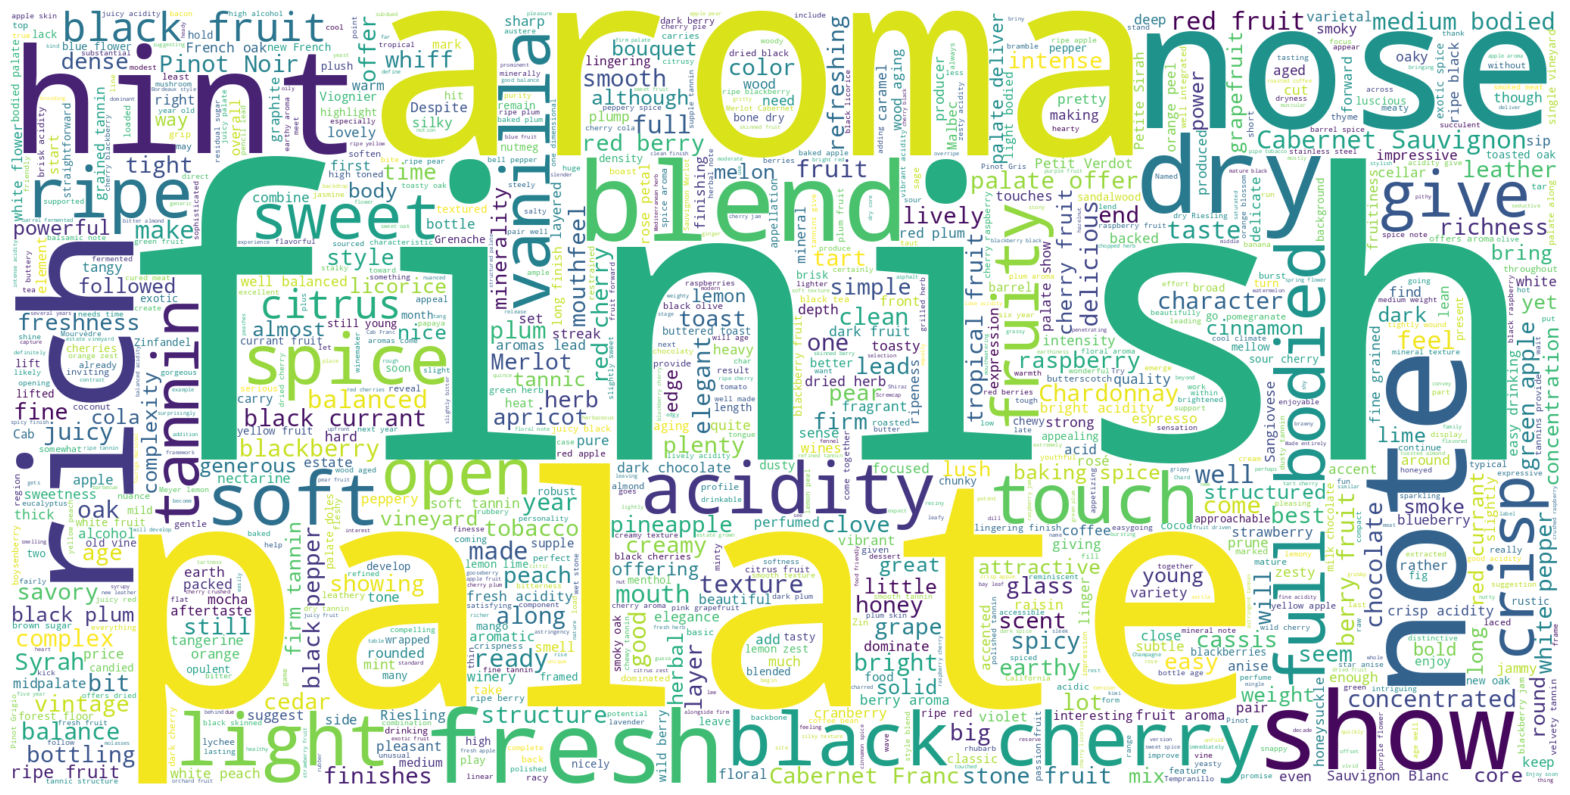

In [39]:
plt.figure(figsize=(20, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# **Conclusão**

*   De onde vem o melhor vinho ?

R: A inglaterra produz em média bons vinhos, mas  os de pontuação mais alta se encontram nos EUA, Italia, França, Portugal

*   O preço do vinho está relacionado com a qualidade ?

R: Sim, mas é possivel encontrar garrafas de 4 dolares de 3 pontos abaixo de uma de 3000 dolares.

*   Certas variedades de uvas são de maior qualidade ?

R: Todas as variedades estão na mesma situação, mas a melhor aposta é no Pinot Noir.

*   Qual é o melhor vinho em cada faixa de preço ?

R: Encontramos bons vinhos em diferentes faixas de preços.


*   Que palavras são mais utilizadas para descrever um vinho ?

R: Bem a bastantes palavras porem as que se destacam são finish e palate.



